In [67]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..\project1')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Import self-made modules
from linear_model import LinearModel
from make_data import FrankeFunction
from prepare_data import create_design_matrix
from model_selection import R2, MSE, cross_validation

# Import plotting functions
from plotting import plot_mse_per_poldegree, plot_R2_per_poldegree

In [116]:
# Choose hyperparameters for model
pol_degree = 10
data_size = 20
test_size = 0.2
error_std = 0.5

In [117]:
# Make data
x = np.random.uniform(0, 1, data_size)
y = np.random.uniform(0, 1, data_size)

z = FrankeFunction(x, y) + np.random.normal(loc=0, scale=error_std)

In [118]:
# Define empty list in which to store the MSE and R2 errors
mses = []
mses_train = []
r2s = []
r2s_train = []

# Train and test model for different polynomial derees
for i in range(1, pol_degree+1):
    X = create_design_matrix(x, y, i)
    
    # Split data in train and test
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = test_size)
    
    # Train model
    lr = LinearModel()
    lr.fit(X_train, z_train)
    
    # Made predictions on train and test set
    z_pred_test = lr.predict(X_test)
    z_pred_train = lr.predict(X_train)
    
    # Calculate errors for test set
    mses.append(MSE(z_test, z_pred_test))
    r2s.append(R2(z_test, z_pred_test))
    
    # Calculate errors for train set
    mses_train.append(MSE(z_train, z_pred_train))
    r2s_train.append(R2(z_train, z_pred_train)) 

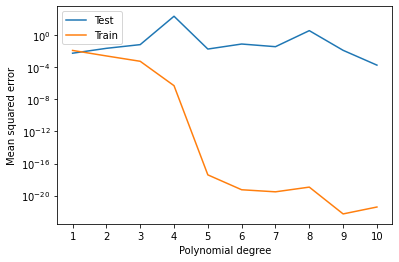

In [119]:
# Plot MSE
plot_mse_per_poldegree(mses_train, mses, pol_degree=pol_degree, save_plot = True, save_title = 'OLS_MSE_n=' + str(data_size) + ', sigma=' + str(error_std))

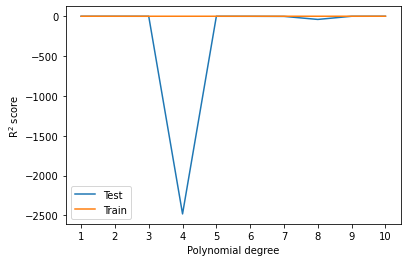

In [120]:
# Plot R2
plot_R2_per_poldegree(r2s_train, r2s, pol_degree=pol_degree, save_plot = True, save_title = 'OLS_R2_n=' + str(data_size) + ', sigma= ' + str(error_std))

In [121]:
lr.coeffs

array([  1.05088795,  -3.01009012,   1.95199629,  -3.46596625,
        -2.23707108,   1.40464228,   3.45763975,   3.27122463,
         1.63455549,  -0.55383671,  -2.69626925,   7.37925159,
         5.33352752,  -2.00939269,  -2.89855789,  -0.39762721,
         1.23662077,   1.03322378,  -0.38457511,  -2.21622927,
        -3.93889403, -31.45669001,   2.25544998,   0.45084686,
         0.75213892,   1.95087729,   1.96618734,   0.83881408,
        -0.76199639,  -2.31318088,  16.97886795,   4.49465818,
        -0.69326293,   0.28273565,   1.38761709,   1.19020245,
         0.15936157,  -1.07020281,  22.75699549,  -1.43045828,
        -3.14210574,  -0.59311292,   0.70905464,   0.55831754,
        -0.23833602,   5.12547393,  -7.13322364,  -3.66313634,
        -0.2865326 ,   0.79124386,   0.51135028, -10.74784804,
        -8.12996488,  -1.80387452,   1.10748912,   1.49261751,
       -15.6139679 ,  -4.45931304,   1.59523833,   3.02904592,
       -10.18140977,   2.03889455,   5.51343613,   1.44

In [98]:
lr_sk = LinearRegression()
lr_sk.fit(X_train, z_train)
lr_sk.coef_

array([ 6.64999092e+00, -8.26054137e+01,  4.70262020e+02, -1.32080618e+03,
        1.08335469e+03,  3.45718005e+03, -1.09503514e+04,  1.33148161e+04,
       -7.79713854e+03,  1.81821199e+03,  8.67614692e-01, -1.03513967e+02,
        1.33549817e+03, -6.33220236e+03,  1.54754617e+04, -2.25591382e+04,
        2.17630804e+04, -1.49608391e+04,  6.97489371e+03, -1.59130230e+03,
        2.27947392e+01,  6.09108784e+02, -6.36295550e+03,  2.33972041e+04,
       -4.42694123e+04,  4.53130550e+04, -2.32324812e+04,  4.17898347e+03,
        2.79026833e+02, -2.60341139e+02, -1.03183268e+03,  1.41905982e+04,
       -4.01234864e+04,  5.79690256e+04, -4.75644407e+04,  2.04507541e+04,
       -3.07609771e+03,  1.26523010e+03, -2.46464766e+03, -1.51745282e+04,
        3.72815643e+04, -3.55341517e+04,  1.68052280e+04, -4.60475881e+03,
       -3.87949464e+03,  1.26617962e+04,  3.63942809e+03, -1.92580311e+04,
        1.35091703e+04, -7.70589741e+02,  7.88338858e+03, -2.14190906e+04,
        7.03032786e+03,  

In [48]:
lr_sk.intercept_

-0.6720904049028388